In [1]:
import numpy as np
import pylab as mplot
%pylab inline

# import matplotlib
# matplotlib.rcParams['font.family'] = "sans-serif"
# matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
size_ratio_grid = np.logspace(np.log10(0.5), np.log10(6), 21)
s2n_grid = np.logspace(np.log10(10), np.log10(400), 21)
print(size_ratio_grid)
print(s2n_grid)
size_ratio_grid2 = [str(xx)[:4] for xx in size_ratio_grid]
s2n_grid2 = [str(xx)[:4] for xx in s2n_grid]

print(np.arange(21)[::4])

[0.5        0.56614681 0.64104443 0.72585052 0.82187591 0.93060486
 1.05371795 1.19311812 1.35096004 1.52968344 1.73205081 1.96119009
 2.22064303 2.51441995 2.84706168 3.2237098  3.65018605 4.1330824
 4.67986285 5.29897887 6.        ]
[ 10.          12.02549604  14.4612555   17.39037707  20.91279105
  25.14866859  30.24252145  36.36813219  43.73448296  52.59288515
  63.2455532   76.05591495  91.46101039 109.9864018  132.26410391
 159.05414575 191.27049996 230.01226394 276.60115687 332.62661161
 400.        ]
[ 0  4  8 12 16 20]


In [3]:
counts = np.zeros((20,20))
sigma_e2 = np.zeros((20,20))
sigma_e2_m = np.zeros((20,20))
R11 = np.zeros((20,20))
R11s = np.zeros((20,20))
R22 = np.zeros((20,20))
R22s = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        X = np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/response_s2n_size/response_'+str(i)+'_'+str(j)+'.txt')
        
        counts[i][j] = X[0]
        R11[i][j] = X[1]
        R11s[i][j] = X[2]
        R22[i][j] = X[3]
        R22s[i][j] = X[4]
        sigma_e2[i][j] = X[5]
        sigma_e2_m[i][j] = X[6]  

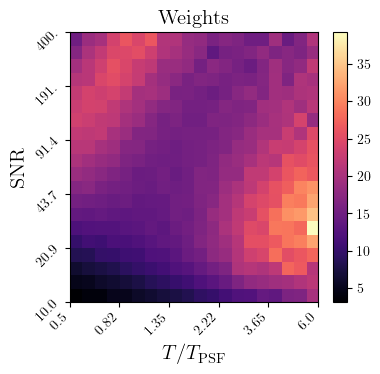

In [4]:
R = (R11+R22)/2 + (R11s+R22s)/2 # do R instead of R_gamma
ww = (1./(sigma_e2*R**(-2))).T

mplot.figure(figsize=(4,3.5))
mplot.imshow(ww, cmap = 'magma', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4]-0.5, size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4]-0.5, s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('Weights', fontsize=15)
mplot.xlabel('$T/T_{\\rm PSF}$', fontsize=15)
mplot.ylabel('SNR', fontsize=15)
mplot.colorbar()

mplot.savefig('weights.pdf', bbox_inches='tight')

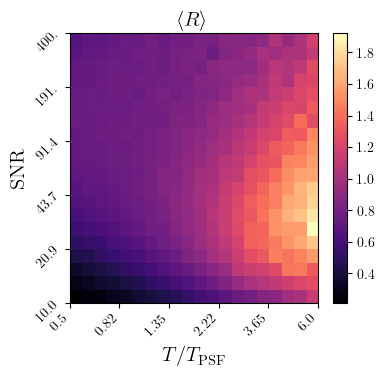

In [6]:
mplot.figure(figsize=(4,3.5))

mplot.imshow(R.T, cmap = 'magma', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4]-0.5, size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4]-0.5, s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('$\\langle R \\rangle$', fontsize=15)
mplot.xlabel('$T/T_{\\rm PSF}$', fontsize=15)
mplot.ylabel('SNR', fontsize=15)
mplot.colorbar()

mplot.savefig('R.pdf', bbox_inches='tight')

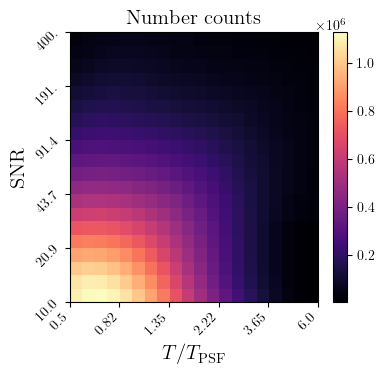

In [7]:
mplot.figure(figsize=(4,3.5))

mplot.imshow(counts.T, cmap = 'magma', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4]-0.5, size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4]-0.5, s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('Number counts', fontsize=15)
mplot.xlabel('$T/T_{\\rm PSF}$', fontsize=15)
mplot.ylabel('SNR', fontsize=15)
mplot.colorbar()

mplot.savefig('counts.pdf', bbox_inches='tight')

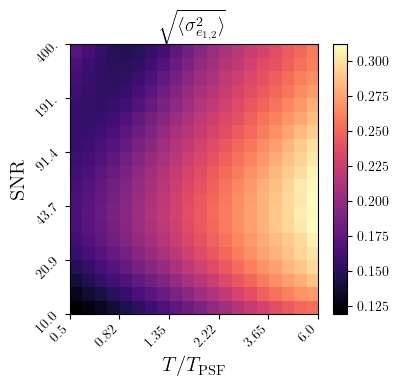

In [8]:

mplot.figure(figsize=(4,3.5))
mplot.imshow((sigma_e2.T)**0.5, cmap = 'magma', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4]-0.5, size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4]-0.5, s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('$\sqrt{ \langle \sigma^2_{e_{1,2}} \\rangle}$', fontsize=14)
mplot.xlabel('$T/T_{\\rm PSF}$', fontsize=15)
mplot.ylabel('SNR', fontsize=15)
mplot.colorbar()

mplot.savefig('sigmae2.pdf', bbox_inches='tight')